# TIME SERIES ANALYSIS FOR REAL ESTATE INVESTMENT

## Group 8 Project Collaborators

**Students Names:**  
    1. Sammy Sifuna  
    2. Julius Charles  
    3. Waruchu Kuria  
    4. Rael Ndonye  
    5. Alan Omondi  
    6. Janet Khainza

## 1.0 Business Understanding
       
### 1.1 Background
Between `1996` to `2018`, the U.S. real estate market underwent significant transformations. It commenced with an increase in home prices driven by a growing perception of real estate as a valuable long-term investment. However, the Great Recession between `2007` to `2009` brought about extensive declines in home values, triggering foreclosures and eroding trust.
Over time,low interest rates and government interventions helped restore stability and confidence in the market. Urbanization gained momentum as more people gravitated towards cities, younger individuals entered the housing market, and technology assumed a pivotal role. Although certain cities thrived, others faced challenges. Regulatory reforms were introduced to prevent potential crises. In conclusion, this era marked a period of adaptation and evolution in the dynamics of buying and selling homes.
![Depiction of a Changing Market Prices](images/time-series-analysis.jpg)


### 1.2 Problem Statement
Waridi Investments, a recently established real estate investment firm, has engaged our services to identify the top `5 zip codes with the potential for the highest return on investment when they sell in 5 years`. Their strategic approach is to initiate short-term investments in one of the most thriving real estate markets in the United States of America. The company places significant emphasis on securing sound investments that ensure consistent cash flow, ultimately enabling them to reinvest effectively when the opportune moment arises.

### 1.3 Objectives
* To determine the top `5 zip codes` that show the highest potential `return on investment (ROI) in 5 years.`
* To determine the `5 least advisable cities` to invest in.
* To identify which `top 5 metropolitan areas` and states have the highest market performance in terms of price growth.
* To determine the best month to invest to maximize ROI.
* To show how factors like economic stability(recession) impact housing market performance.

#### Hypotheis testing
**Null Hypothesis (H0):** `The variables do not help predict future real estate prices`

**Alternative Hypothesis (H1):** `The variables predict future real estate prices`

## 2.0 Data Understanding

This data represents median monthly housing sales prices for `265 zip codes in the USA`, over the period of `April 1996 through April 2018` as reported by Zillow.

Each row represents a unique zip code. Each record contains location information and median housing sales prices for each month.

There are `11568 rows and 272 variables`:

* RegionID: Unique index
* RegionName: Unique Zip Code
* City: City in which the zip code is located
* State: State in which the zip code is located
* Metro: Metropolitan Area in which the zip code is located
* CountyName: County in which the zip code is located
* SizeRank: Numerical rank of size of zip code, ranked 1 through 14723
* 1996-04 through 2018-04: refers to the median housing sales values for `April 1996 through April 2018`, that is `265 data points` of monthly data for each zip code

We shall check for the accuracy of our forecasts using `MSE (Mean Squared Error)`. This will provide us with the average error of our forecasts.

#### Assumptions:
1. The zip codes are representative of the broader real estate market in the United States.
2. The real estate market conditions during this period were influenced by various economic and socio-political factors.
3. The data covers a combination of urban, suburban, and rural area.
4. The data doesn't reflect significant improvements or renovations made to properties over time that could increase or decrease prices.

In [2]:
# Import libraries
import numpy as np
import folium
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats
from random import gauss as gs
import math
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#loading dataset and viewing first 5 rows
data = pd.read_csv('data/zillow_data.csv')

data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [5]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [6]:
# Examine the shape of the dataset
data.shape

(14723, 272)

In [110]:
# Viewing number of zipcodes in dataset and nan values
print('Total number of zipcodes:', len(data))
data.iloc[:, :20].isna().sum()

Total number of zipcodes: 14723


RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
dtype: int64

In [111]:
#Inspecting dataframe dtypes

data.iloc[:, :10].dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
dtype: object

In [112]:
# change 'RegionName' column to 'ZipCode' to avoid confusion
data.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

data.ZipCode = data.ZipCode.astype('string')

#confirming the change
print(data.dtypes["ZipCode"])

string


In [113]:
# check for duplicates
data.duplicated().sum()

0

In [114]:
# all missing data because of the datatime appearing as columns
data.isnull().sum()

RegionID       0
ZipCode        0
City           0
State          0
Metro       1043
            ... 
2017-12        0
2018-01        0
2018-02        0
2018-03        0
2018-04        0
Length: 272, dtype: int64

## **Exploratory Data Analysis(EDA) and Feature Engineering**

### **Missing Values**

There are some missing values in the `Metro` and `dates` columns.

In [115]:
# Define a function to explore missing data
def missing_data(data):
    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

# Apply missing_data function to the dataframe
missing_data(data)

,0
Metro,1043
1996-04,1039
1996-05,1039
1996-06,1039
1996-07,1039
...,...
2014-02,56
2014-03,56
2014-04,56
2014-05,56


- Missing values in the **Metro** column are replaced with **missing**.  
- Missing values in the dates columns are backfilled.

In [116]:
# replacing the missing values bin Metro with 'missing'
data.Metro.fillna('missing', inplace=True)

# interpolate missing values on date columns
data.interpolate(method="pad", inplace=True)

data.isna().sum().sum()

0

### **Creating New Columns for Analysis**

- In finance, the coefficient of variation allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.
- Ideally, if the coefficient of variation formula should result in a lower ratio of the standard deviation to mean return, then the better the risk-return trade-off.
- (**CONFIRM**)Therefore, in these next steps we are going to filter the data some more by calculating the CV value and only selecting values with in the company's risk factor (assume 60 percentile).

In [117]:
# calculating and creating a new column -ROI
data['ROI'] = (data['2018-04']/ data['1996-04'])-1

#calculating std to be used to find CV
data["std"] = data.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
data["mean"] = data.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV
data["CV"] = data['std']/ data["mean"]

data.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', 'ROI',
       'std', 'mean', 'CV'],
      dtype='object', length=276)

### **Converting to Time Series**

**Step 1: Changing the dataframe from wide view to long view**

In [118]:
melted_data = data.copy()

In [119]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','ZipCode', 'City', 'State', 'Metro',
                                    'CountyName', 'SizeRank', 'std', 'mean','ROI', 'CV' ],
                     var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

melted_data = melt_df(melted_data)

**Step 2: Converting the Date Column to DateTime Format and Setting it as the Index**

In [120]:
# Convert 'date' column to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Date'])

# Set the 'Date' column as index
melted_data.set_index('Date', inplace=True)

In [121]:
melted_data.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,std,mean,ROI,CV,value
Date,,,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,190821.103965,743978.867925,2.083782,0.256487,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,33537.101427,219655.849057,0.365295,0.152680,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,37730.794353,262110.566038,0.567966,0.143950,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,231225.944628,974139.245283,1.623971,0.237364,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,18167.079218,101875.471698,0.571798,0.178326,77300.0


In [122]:
# confirming the new columns are added correctly
melted_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   ZipCode     string 
 2   City        object 
 3   State       object 
 4   Metro       object 
 5   CountyName  object 
 6   SizeRank    int64  
 7   std         float64
 8   mean        float64
 9   ROI         float64
 10  CV          float64
 11  value       float64
dtypes: float64(5), int64(2), object(4), string(1)
memory usage: 387.0+ MB


### **Narrowing Down to a Few Zip Codes from the Data**
- The data is quite large.
- Therefore, the analysis will filter out the first 1000 zip codes per state based on median prices (`value`).

In [123]:
# Group by 'State' and get the top 1000 zip codes for each state based on median prices
top_zipcodes = (melted_data.sort_values(['State', 'value'], ascending=[True, False])
                .groupby('State')
                .head(1000))

# # Create a new DataFrame with the selected data
top_zipcodes_df = pd.DataFrame({
    # 'Date': top_zipcodes['Date'],
    'State': top_zipcodes['State'],
    'County': top_zipcodes['CountyName'],
    'Metro': top_zipcodes['Metro'],
    'City': top_zipcodes['City'],
    'ZipCode': top_zipcodes['ZipCode'],
    'Value': top_zipcodes['value'],
    'std': top_zipcodes['std'],
    'mean': top_zipcodes['mean'],
    'ROI': top_zipcodes['ROI'],
    'CV': top_zipcodes['CV']

})

# # Display the result
top_zipcodes_df.head()

,State,County,Metro,City,ZipCode,Value,std,mean,ROI,CV
Date,,,,,,,,,,
2016-11-01,AK,Anchorage,Anchorage,Anchorage,99516,498100.0,108903.972298,375657.358491,1.704731,0.289902
2016-07-01,AK,Anchorage,Anchorage,Anchorage,99516,497800.0,108903.972298,375657.358491,1.704731,0.289902
2016-12-01,AK,Anchorage,Anchorage,Anchorage,99516,497600.0,108903.972298,375657.358491,1.704731,0.289902
2016-10-01,AK,Anchorage,Anchorage,Anchorage,99516,497500.0,108903.972298,375657.358491,1.704731,0.289902
2018-03-01,AK,Anchorage,Anchorage,Anchorage,99516,497500.0,108903.972298,375657.358491,1.704731,0.289902


In [124]:
top_zipcodes_df.index.name

'Date'

In [125]:
top_zipcodes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51000 entries, 2016-11-01 to 2014-02-01
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   State    51000 non-null  object 
 1   County   51000 non-null  object 
 2   Metro    51000 non-null  object 
 3   City     51000 non-null  object 
 4   ZipCode  51000 non-null  string 
 5   Value    51000 non-null  float64
 6   std      51000 non-null  float64
 7   mean     51000 non-null  float64
 8   ROI      51000 non-null  float64
 9   CV       51000 non-null  float64
dtypes: float64(5), object(4), string(1)
memory usage: 4.3+ MB


- The data now has 51000 records, i.e. 1000 zipcodes from 51 states.

In [126]:
top_zipcodes_df.columns

Index(['State', 'County', 'Metro', 'City', 'ZipCode', 'Value', 'std', 'mean',
       'ROI', 'CV'],
      dtype='object')

In [127]:
top_zipcodes_df.describe()

,Value,std,mean,ROI,CV
count,5.100000e+04,5.100000e+04,5.100000e+04,51000.000000,51000.000000
mean,8.760330e+05,2.570727e+05,6.788827e+05,3.940624,0.342105
std,1.176212e+06,5.286190e+05,8.174821e+05,22.741604,0.187040
min,1.623000e+05,1.866613e+04,9.586755e+04,-0.912302,0.088818
25%,3.780000e+05,7.686192e+04,2.747581e+05,0.734187,0.229045
50%,5.750000e+05,1.379157e+05,4.315645e+05,1.422403,0.289101
75%,9.185500e+05,2.530333e+05,7.718940e+05,2.478723,0.381796
max,1.931490e+07,6.686020e+06,8.366725e+06,344.461390,1.701296


### **5-year Return on Investment**

In [128]:
# Create a new 'year' column based on the year from the datetime index
top_zipcodes_df['Year'] = top_zipcodes_df.index.year

# Define a function to group dates into 5-year periods
def create_5_year_periods(year):
    return f"{year}-{year+4}"

# Apply the function to create the '5-year-periods' column
top_zipcodes_df['5-year-periods'] = top_zipcodes_df['Year'].apply(create_5_year_periods)

top_zipcodes_df.tail()

,State,County,Metro,City,ZipCode,Value,std,mean,ROI,CV,Year,5-year-periods
Date,,,,,,,,,,,,
2017-06-01,WY,Converse,missing,Douglas,82633,219000.0,23974.269738,177132.452830,0.540394,0.135347,2017,2017-2021
2017-08-01,WY,Albany,Laramie,Laramie,82072,219000.0,26301.503054,186305.283019,0.409578,0.141174,2017,2017-2021
2018-02-01,WY,Park,missing,Powell,82435,219000.0,18666.128673,173243.396226,0.400000,0.107745,2018,2018-2022
2015-11-01,WY,Albany,Laramie,Laramie,82070,218900.0,29098.670943,186173.207547,0.547927,0.156299,2015,2015-2019
2014-02-01,WY,Albany,Laramie,Laramie,82070,218800.0,29098.670943,186173.207547,0.547927,0.156299,2014,2014-2018


#### **Calculate Mean ROI for each 5-year period**

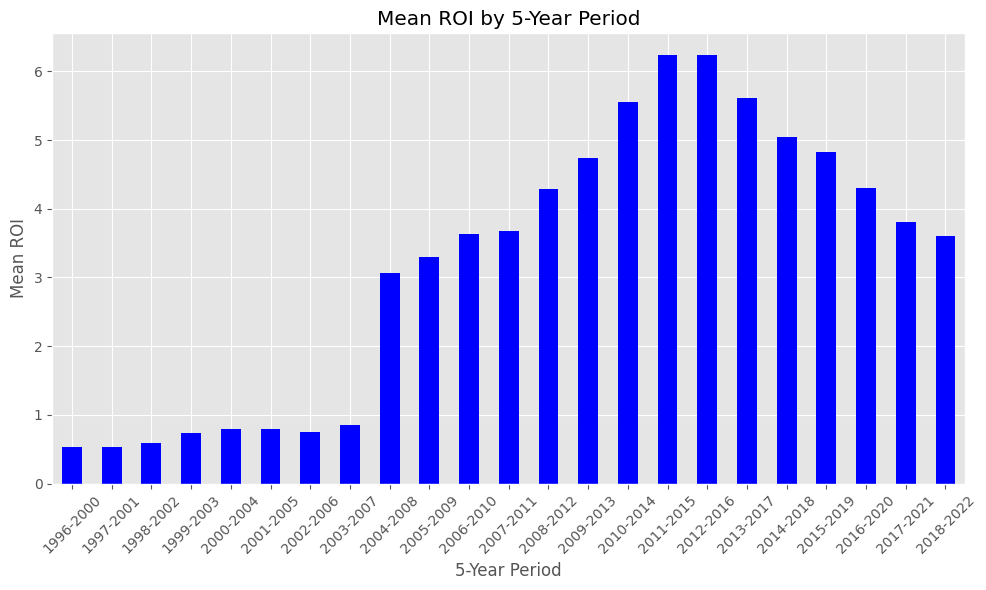

In [147]:
mean_roi_by_period = top_zipcodes_df.groupby('5-year-periods')['ROI'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
mean_roi_by_period.plot(kind='bar', color='blue')
plt.title('Mean ROI by 5-Year Period')
plt.xlabel('5-Year Period')
plt.ylabel('Mean ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
# List of 5-year periods start and end years
periods = [(1998, 2003), (2003, 2008), (2008, 2013), (2013, 2018)]

# Create a new DataFrame to store ROI values
roi_data = pd.DataFrame()

# Calculate ROI for each period and store in the new DataFrame
for start_year, end_year in periods:
    start_col = str(start_year) + '-04'  # Assuming April data is available for each year
    end_col = str(end_year) + '-04'

    roi_data['ROI_' + str(start_year) + '-' + str(end_year)] = (
        (data[end_col] - top_zipcodes_df[start_col]) / top_zipcodes_df[start_col]
    ) * 100

# Display the new DataFrame with ROI values for each period
print(roi_data)


ValueError: ignored

### **Determine the top 5 zip codes that show the highest potential return on investment (ROI)**

                ROI
ZipCode            
10021    344.461390
31561    179.740741
10011     79.492987
11231     40.421769
10014     32.631006


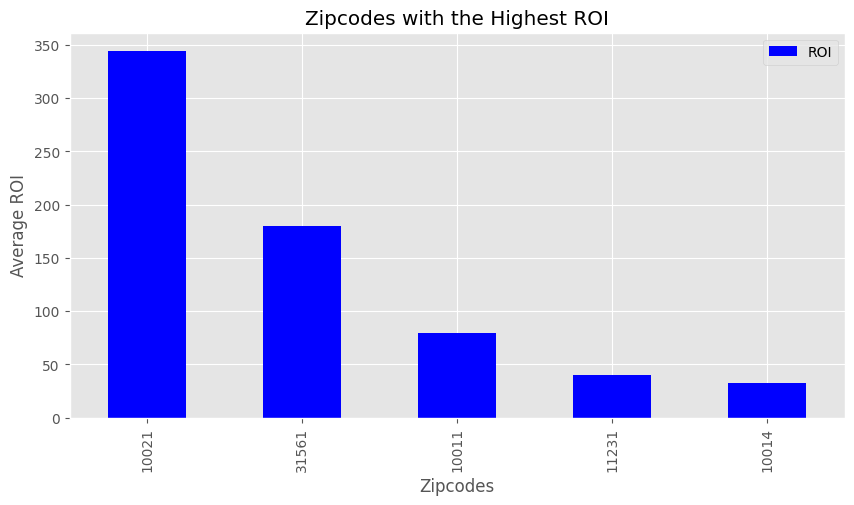

In [149]:
# Create a DataFrame of the top 5 zip codes
top_zipcodes_ROI = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["ROI"].mean().sort_values(ascending=False).head(5))
print(top_zipcodes_ROI)

# Create a bar chart of the average ROI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
top_zipcodes_ROI.plot(kind='bar', ax=ax, color="blue")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Highest ROI")
ax.set_ylabel("Average ROI");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [131]:
#top 5 zipcodes in terms of ROI
top_5_zipcodes_ROI =['10021', '31561', '10011', '11231', '10014']

top5_roi_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(top_5_zipcodes_ROI)]
top5_roi_df.head()

,State,County,Metro,City,ZipCode,Value,std,mean,ROI,CV,Year,5-year-periods
Date,,,,,,,,,,,,
2007-11-01,GA,Glynn,Brunswick,Sea Island,31561,2935800.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2007,2007-2011
2007-12-01,GA,Glynn,Brunswick,Sea Island,31561,2935300.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2007,2007-2011
2008-01-01,GA,Glynn,Brunswick,Sea Island,31561,2931900.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2008,2008-2012
2007-10-01,GA,Glynn,Brunswick,Sea Island,31561,2926500.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2007,2007-2011
2008-02-01,GA,Glynn,Brunswick,Sea Island,31561,2919600.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2008,2008-2012


               CV
ZipCode          
56041    1.701296
2116     1.476219
16102    1.295869
43013    1.183662
24054    1.020255


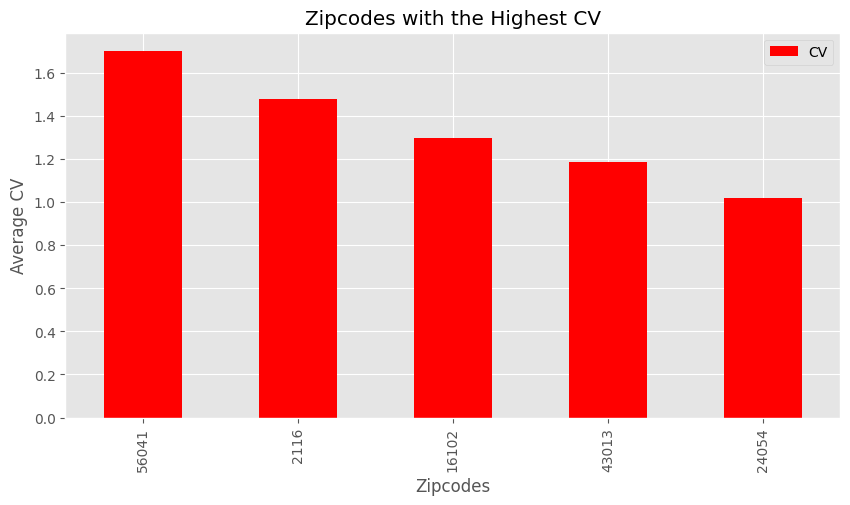

In [132]:
# Create a DataFrame of the top 5 zip codes
top_zipcodes_CV = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["CV"].mean().sort_values(ascending=False).head(5))
print(top_zipcodes_CV)

# Create a bar chart of the average CV
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
top_zipcodes_CV.plot(kind='bar', ax=ax, color="red")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Highest CV")
ax.set_ylabel("Average CV");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [133]:
#top 5 zipcodes in terms of CV
top_5_zipcodes_CV =['56041', '2116', '16102', '43013', '24054']

top5_cv_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(top_5_zipcodes_CV)]
top5_cv_df.head()

,State,County,Metro,City,ZipCode,Value,std,mean,ROI,CV,Year,5-year-periods
Date,,,,,,,,,,,,
2018-04-01,MA,Suffolk,Boston,Boston,2116,2136500.0,663382.278771,449379.245283,22.45225,1.476219,2018,2018-2022
2018-03-01,MA,Suffolk,Boston,Boston,2116,2106500.0,663382.278771,449379.245283,22.45225,1.476219,2018,2018-2022
2017-12-01,MA,Suffolk,Boston,Boston,2116,2064500.0,663382.278771,449379.245283,22.45225,1.476219,2017,2017-2021
2017-11-01,MA,Suffolk,Boston,Boston,2116,2057800.0,663382.278771,449379.245283,22.45225,1.476219,2017,2017-2021
2018-02-01,MA,Suffolk,Boston,Boston,2116,2056900.0,663382.278771,449379.245283,22.45225,1.476219,2018,2018-2022


### **Determine the 5 Least Advisable Cities to Invest in**

              ROI
ZipCode          
67473   -0.834832
71075   -0.849241
24054   -0.876821
28039   -0.908117
16102   -0.912302


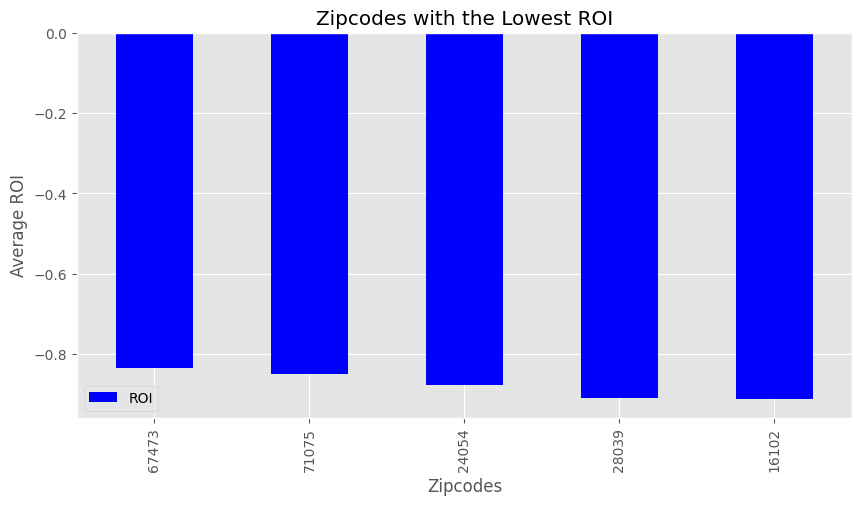

In [134]:
# Create a DataFrame of the bottom 5 zip codes
bottom_zipcodes_ROI = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["ROI"].mean().sort_values(ascending=False).tail(5))
print(bottom_zipcodes_ROI)

# Create a bar chart of the average ROI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
bottom_zipcodes_ROI.plot(kind='bar', ax=ax, color="blue")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Lowest ROI")
ax.set_ylabel("Average ROI");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [135]:
# bottom 5 zipcodes in terms of ROI
bottom_5_zipcodes_ROI =['67473', '71075', '24054', '28039', '16102']

bottom5_roi_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(bottom_5_zipcodes_ROI)]
bottom5_df.head()

,State,County,Metro,City,ZipCode,Value,std,mean,ROI,CV,Year,5-year-periods
Date,,,,,,,,,,,,
2007-11-01,GA,Glynn,Brunswick,Sea Island,31561,2935800.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2007,2007-2011
2007-12-01,GA,Glynn,Brunswick,Sea Island,31561,2935300.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2007,2007-2011
2008-01-01,GA,Glynn,Brunswick,Sea Island,31561,2931900.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2008,2008-2012
2007-10-01,GA,Glynn,Brunswick,Sea Island,31561,2926500.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2007,2007-2011
2008-02-01,GA,Glynn,Brunswick,Sea Island,31561,2919600.0,1.198596e+06,1.406019e+06,179.740741,0.852475,2008,2008-2012


               CV
ZipCode          
38139    0.103142
74137    0.101036
46037    0.098410
46077    0.091697
44040    0.088818


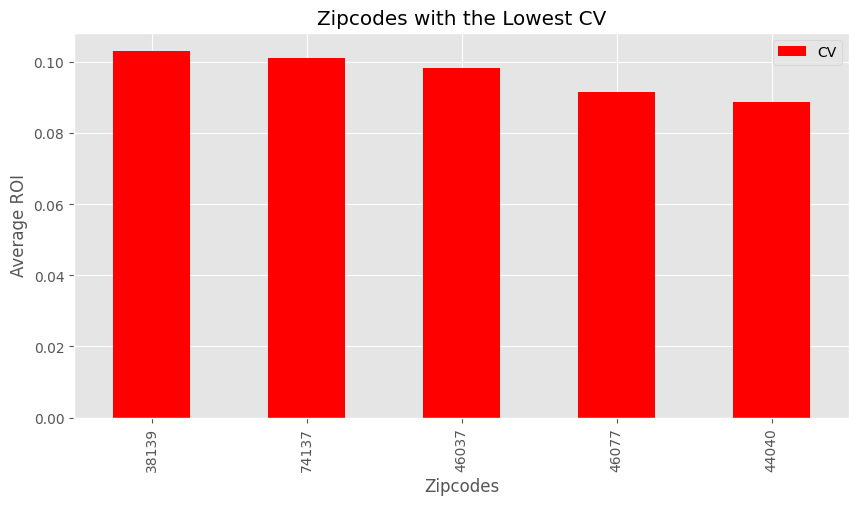

In [136]:
# Create a DataFrame of the bottom 5 zip codes
bottom_zipcodes_CV = pd.DataFrame(top_zipcodes_df.groupby("ZipCode")["CV"].mean().sort_values(ascending=False).tail(5))
print(bottom_zipcodes_CV)

# Create a bar chart of the average ROI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
bottom_zipcodes_CV.plot(kind='bar', ax=ax, color="red")

# Set the title, labels, and ticks
plt.title("Zipcodes with the Lowest CV")
ax.set_ylabel("Average ROI");
ax.set_xlabel("Zipcodes")
# plt.xticks(fontsize= 18)

# Show the bar chart
plt.show()

In [137]:
# bottom 5 zipcodes in terms of CV
bottom_5_zipcodes_CV =['38139', '74137', '46037', '46077', '44040']

bottom5_cv_df = top_zipcodes_df[top_zipcodes_df['ZipCode'].isin(bottom_5_zipcodes_CV)]
bottom5_cv_df.head()

,State,County,Metro,City,ZipCode,Value,std,mean,ROI,CV,Year,5-year-periods
Date,,,,,,,,,,,,
2018-04-01,IN,Boone,Indianapolis,Zionsville,46077,394800.0,28488.424284,310680.0,0.562945,0.091697,2018,2018-2022
2018-03-01,IN,Boone,Indianapolis,Zionsville,46077,390400.0,28488.424284,310680.0,0.562945,0.091697,2018,2018-2022
2018-02-01,IN,Boone,Indianapolis,Zionsville,46077,385300.0,28488.424284,310680.0,0.562945,0.091697,2018,2018-2022
2018-01-01,IN,Boone,Indianapolis,Zionsville,46077,383300.0,28488.424284,310680.0,0.562945,0.091697,2018,2018-2022
2017-12-01,IN,Boone,Indianapolis,Zionsville,46077,382700.0,28488.424284,310680.0,0.562945,0.091697,2017,2017-2021


### **Which are the Top 5 Metro Areas and States with the Highest Market Performance in Terms of Price Growth** (correct graph)

Top 5 Metropolitan Areas with the Highest Market Performance in Terms of Price Growth:
('New Castle', 'PA')
('Martinsville', 'VA')
('Shreveport', 'LA')
('Seneca', 'SC')
('Columbus', 'GA')


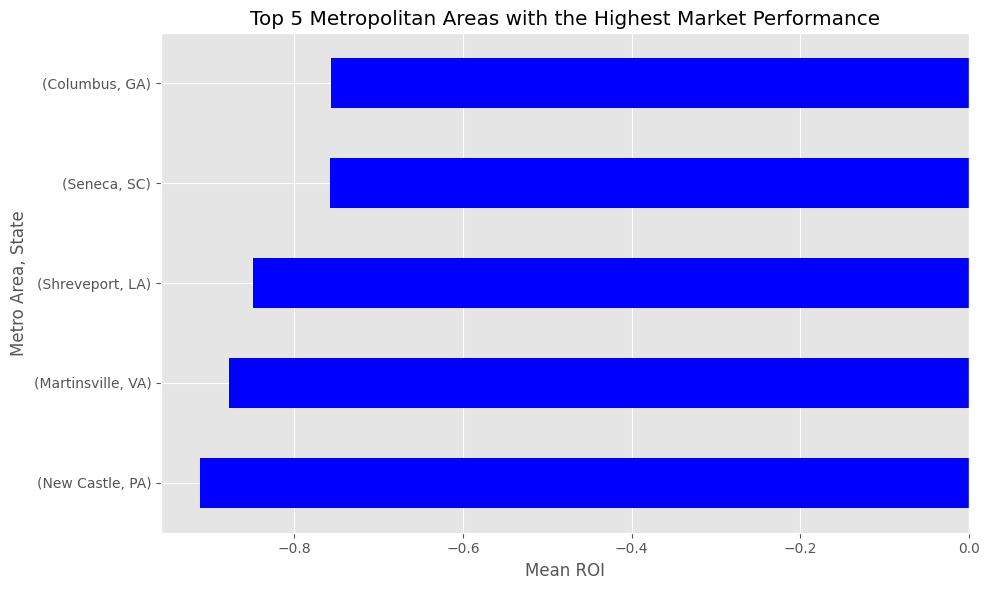

In [138]:
# Group the data by metro area and state and calculate the mean ROI
top_metro_areas_df = top_zipcodes_df.groupby(["Metro", "State"])["ROI"].mean()

# Sort by mean ROI
top_metro_areas_df = top_metro_areas_df.sort_values(ascending=True)

# Get the top 5 metropolitan areas
top_5_metro_areas = top_metro_areas_df.index[:5]

# Print the top 5 metropolitan areas
print("Top 5 Metropolitan Areas with the Highest Market Performance in Terms of Price Growth:")
for metro_area in top_5_metro_areas:
    print(metro_area)

# Plot a horizontal bar graph
plt.figure(figsize=(10, 6))
top_metro_areas_df.loc[top_5_metro_areas].plot(kind='barh', color='blue')
plt.xlabel('Mean ROI')
plt.ylabel('Metro Area, State')
plt.title('Top 5 Metropolitan Areas with the Highest Market Performance')
plt.tight_layout()
plt.show()

In [139]:
# Group the data by state and calculate the mean ROI
top_cities_df = top_zipcodes_df.groupby(["City", "State"])["ROI"].mean()

# Sort by mean ROI
top_cities_df = top_cities_df.sort_values(ascending=False)

# Get the top 5 states
top_cities_df = top_cities_df.index[:5]

# Print the top 5 states
print("Top 5 Cities with the Highest Market Performance in Terms of Price Growth:")
for city in top_cities_df:
    print(city)

Top 5 Cities with the Highest Market Performance in Terms of Price Growth:
('Sea Island', 'GA')
('New York', 'NY')
('Ketchum', 'ID')
('Boston', 'MA')
('Zephyr Cove', 'NV')


### **Determine the best month to invest to maximize ROI**

In [140]:
# Group the data by month and calculate the mean ROI
monthly_roi_df = top_zipcodes_df.groupby("Date")["ROI"].mean()

# Sort by mean ROI
monthly_roi_df = monthly_roi_df.sort_values(ascending=False)

# Get the month with the highest mean ROI
best_month = monthly_roi_df.index[0]

# Print the best month
print("The best month to invest to maximize ROI is:", best_month)

The best month to invest to maximize ROI is: 2012-01-01 00:00:00


In [141]:
monthly_roi_df.head()

Date
2012-01-01    6.455961
2011-12-01    6.408751
2012-02-01    6.407686
2012-04-01    6.387725
2012-03-01    6.381454
Name: ROI, dtype: float64

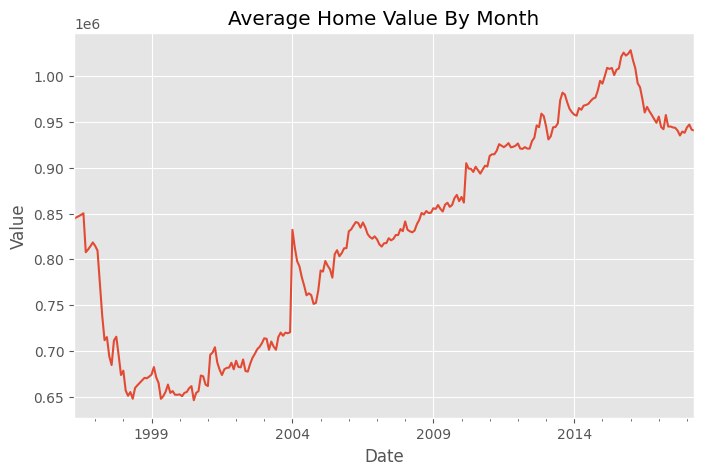

Earliest Dates
Date
1996-04-01    844316.666667
1996-05-01    845825.000000
1996-06-01    847191.666667
1996-07-01    848566.666667
1996-08-01    850300.000000
Freq: MS, Name: Value, dtype: float64

Most Recent
Date
2017-12-01    938186.372745
2018-01-01    944122.745098
2018-02-01    947162.948960
2018-03-01    941500.184162
2018-04-01    940774.358974
Freq: MS, Name: Value, dtype: float64


In [142]:
monthly_data = top_zipcodes_df['Value'].resample('MS').mean()
monthly_data = monthly_data.fillna(monthly_data.bfill())
monthly_data.plot(figsize=(8,5))
plt.title('Average Home Value By Month')
plt.ylabel('Value')
plt.show()
print("Earliest Dates")
print(monthly_data.head())
print()
print("Most Recent")
print(monthly_data.tail())

<Axes: xlabel='Date'>

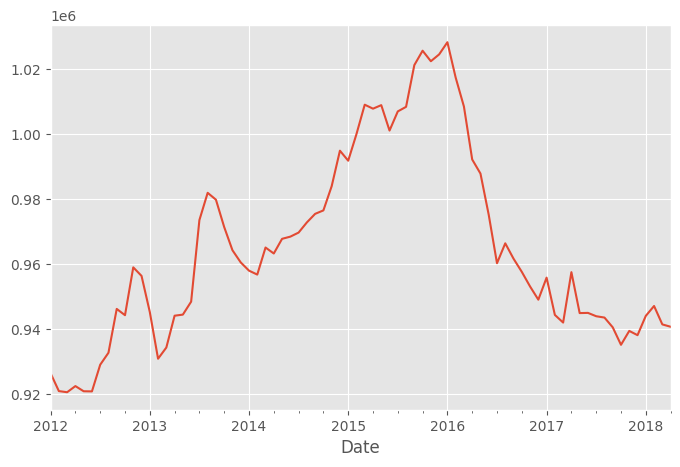

In [143]:
monthly_data['2012':].plot(figsize=(8,5))

## **Modeling**
- To begin the modelling, the data will be checked for `trend`, `seasonality` and `residuals`.

### **Checking for Trend** (correct this)

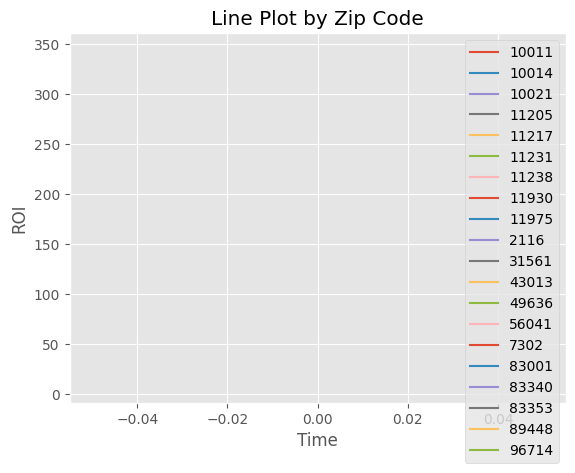

In [144]:
#checking for trends in the dataset

# Calculate mean ROI for each ZipCode and sort in descending order
top_zipcodes_by_mean_roi = top_zipcodes_df.groupby("ZipCode")["ROI"].mean().sort_values(ascending=False).head(20)

for zip_code, region_data in top_zipcodes_by_mean_roi.groupby("ZipCode"):
  zipcode_data = top_zipcodes_df[top_zipcodes_df["ZipCode"] == zip_code]
  values = zipcode_data['ROI'].mean()  # Select the mean 'ROI'
  plt.plot(values, label=zip_code)  # Plot the values with zip code as label

plt.xlabel('Time')
plt.ylabel('ROI')
plt.title('Line Plot by Zip Code')
plt.legend()
plt.show()

In [145]:
def seasonal_decomposition(df):
    decomposition = seasonal_decompose(df)

    # Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(8,8))
    plt.subplot(411)
    plt.plot(df, label='Original', color='blue')
    #plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

### **Check for Seasonality**

In [146]:
seasonal_decompose(top_zipcodes_df["ROI"])

ValueError: ignored

### **Check for Stationarity**

In [ ]:
# Extract the 'ROI' column for analysis
roi_series = top_zipcodes_df['ROI']

# Apply the ADF test
result = adfuller(roi_series)

# Print the ADF test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print("Is Stationary:", "No" if result[1] > 0.05 else "Yes")


- The series `**is stationary**` because the p-value is less than 0.05.
- There will be no need to difference.

In [ ]:
# Checking by State
grouped = top_zipcodes_df.groupby('State')

# For each group (State) apply ADF test
for state, group in grouped:

    # Extract the ROI values for the current state
    roi_values = group['ROI']

    # Performing Augmented Dickey Fuller test
    result = adfuller(roi_values)

    # Print State Name, Test Statistics and p-value
    print(f"State: {state}")
    print(f"Test Statistics: {result[0]}")
    print(f"p-value: {result[1]}")

    # Determine if the data is stationary
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

    print("\n")


ARIMA

In [ ]:
# top_zipcodes_df to csv
csv_file_path = 'top_zipcodes_data.csv'
top_zipcodes_df.to_csv(csv_file_path, index=False)